Enter the dimensions of the Rectangle: 13 20
Enter number of Triangles desired: 17
Vertex 0:[0.12526812 6.9268792 ]
Vertex 1:[7.81016459 8.8339855 ]
Vertex 2:[9.26232942 7.88068387]
Vertex 3:[11.36712827 12.40014254]
Vertex 4:[9.62608071 6.33268146]
Vertex 5:[ 3.08058739 13.83827524]
Vertex 6:[5.2506825 5.1232767]
Vertex 7:[10.74427258  0.        ]
Vertex 8:[0. 0.]
Vertex 9:[13.  0.]
Vertex 10:[ 0. 20.]
Vertex 11:[13. 20.]
The Triangle 0 shares edges with : 
Triangle 1
Triangle 4
The Triangle 1 shares edges with : 
Triangle 0
Triangle 9
Triangle 2
The Triangle 2 shares edges with : 
Triangle 12
Triangle 5
Triangle 1
The Triangle 3 shares edges with : 
Triangle 4
Triangle 7
The Triangle 4 shares edges with : 
Triangle 3
Triangle 0
Triangle 5
The Triangle 5 shares edges with : 
Triangle 2
Triangle 8
Triangle 4
The Triangle 6 shares edges with : 
Triangle 10
Triangle 7
The Triangle 7 shares edges with : 
Triangle 6
Triangle 3
Triangle 8
The Triangle 8 shares edges with : 
Triangle 5
Trian

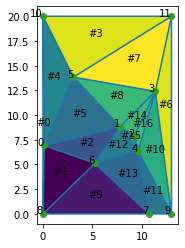

In [10]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import random

a,b = input("Enter the dimensions of the Rectangle: ").split()
a=int(a)
b=int(b)
n = int(input("Enter number of Triangles desired: ")) 
l = []
k = []
c = int(n/2)
d = int((n-3)/2)  
if n % 2 == 0:
    for i in range(0, c - 1):
        z = random.uniform(0,a)
        w = random.uniform(0,b)
        k = z,w
        l.append(k)
else:
    for i in range(0, (d)):
        z = random.uniform(0,a)
        w = random.uniform(0,b)
        m = z,w
        l.append(m)
    g = random.uniform(0, a)
    j = g, 0
    l.append(j)

l.append((0, 0))
l.append((a, 0))
l.append((0, b))
l.append((a, b))

points = np.array(l)
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right')
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center')
v=0 
for q in points:
    print("Vertex "+str(v)+":"+str(q))
    v=v+1
    

for i in range(n):
    x = tri.neighbors[i]
    N = x.tolist()
    for k in N:
        if k == -1:
            N.remove(k)
    for l in N:
        if l == -1:
            N.remove(l)
    print("The Triangle " + str(i) + " shares edges with : ")
    for i in N:
        print("Triangle", i)

centers = np.sum(points[tri.simplices], axis=1, dtype='int')/3.0
colors = np.array([ (x-a/2.)*2 + (y-b/2.)*2 for x,y in centers])
plt.tripcolor(points[:,0], points[:,1], tri.simplices.copy(), facecolors=colors, edgecolors='k')
plt.gca().set_aspect('equal')
plt.show()